### **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Loading the Dataset**

In [ ]:
file_path = '/content/customer_segmentation.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

  InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


### **Data Preprocessing**

In [ ]:
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
# Convert 'Quantity' and 'UnitPrice' to numeric types
# Debugging: Print unique values before conversion
print("Unique values in 'Quantity' before conversion:", data['Quantity'].unique())
print("Unique values in 'UnitPrice' before conversion:", data['UnitPrice'].unique())

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

Unique values in 'Quantity' before conversion: [    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    -1    50    40   100
   192   432   144   288   -12   -24    16     9   128    25    30    28
     7    72   200   600   480    -6    14    -2    -4    -5    -7    -3
    11    70   252    60   216   384    27   108    52 -9360    75   270
    42   240    90   320    17  1824   204    69   -36  -192  -144   160
  2880  1400    19    39   -48   -50    56    13  1440    -8    15   720
   -20   156   324    41   -10    81   864   114   400   -35   -18    21
    -9   250    33   300   176   768   576    26    88   -96   -13    43
   700   900   500   800  1200   150    35  -102   -25   360    84  1296
  2160]
Unique values in 'UnitPrice' before conversion: [2.55000e+00 3.39000e+00 2.75000e+00 7.65000e+00 4.25000e+00 1.85000e+00
 1.69000e+00 2.10000e+00 3.75000e+00 1.65000e+00 4.95000e+00 9.95000e+00
 5.95000e+00 7.95000e

In [ ]:
# Debugging: Print unique values after conversion
print("Unique values in 'Quantity' after conversion:", data['Quantity'].unique())
print("Unique values in 'UnitPrice' after conversion:", data['UnitPrice'].unique())

Unique values in 'Quantity' after conversion: [    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    -1    50    40   100
   192   432   144   288   -12   -24    16     9   128    25    30    28
     7    72   200   600   480    -6    14    -2    -4    -5    -7    -3
    11    70   252    60   216   384    27   108    52 -9360    75   270
    42   240    90   320    17  1824   204    69   -36  -192  -144   160
  2880  1400    19    39   -48   -50    56    13  1440    -8    15   720
   -20   156   324    41   -10    81   864   114   400   -35   -18    21
    -9   250    33   300   176   768   576    26    88   -96   -13    43
   700   900   500   800  1200   150    35  -102   -25   360    84  1296
  2160]
Unique values in 'UnitPrice' after conversion: [2.55000e+00 3.39000e+00 2.75000e+00 7.65000e+00 4.25000e+00 1.85000e+00
 1.69000e+00 2.10000e+00 3.75000e+00 1.65000e+00 4.95000e+00 9.95000e+00
 5.95000e+00 7.95000e+0

In [ ]:
# Remove rows with non-numeric 'Quantity' or 'UnitPrice'
data = data.dropna(subset=['Quantity', 'UnitPrice'])

In [ ]:
# Ensure 'CustomerID' is treated as a categorical variable
data['CustomerID'] = data['CustomerID'].astype(str)

In [ ]:
# Check for missing values
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Recency        0
dtype: int64


### **Handling Missing Values**

In [ ]:
# For simplicity, let's drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

In [ ]:
# Calculate the total price per row
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

### **Calculate Recency, Frequency, and Monetary (RFM) values for each customer**

In [ ]:
# Recency: days since the last purchase
data['Recency'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
# Frequency: number of purchases
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
# Monetary: total spent
monetary = data.groupby('CustomerID')['TotalPrice'].sum()

# Combine RFM values into a single DataFrame
rfm = pd.DataFrame({'Recency': data.groupby('CustomerID')['Recency'].min(),
                    'Frequency': frequency,
                    'Monetary': monetary})

In [ ]:
# Display the RFM DataFrame
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12352.0           2          1    120.33
12370.0           9          1    938.39
12383.0           6          1    357.07
12388.0          10          1    210.90
12395.0         106          1    346.10


In [ ]:
# Split the data into training and testing sets
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Monetary']  # Assuming monetary value as the target for simplicity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.098731666843525e-25
R-squared: 1.0


### ###

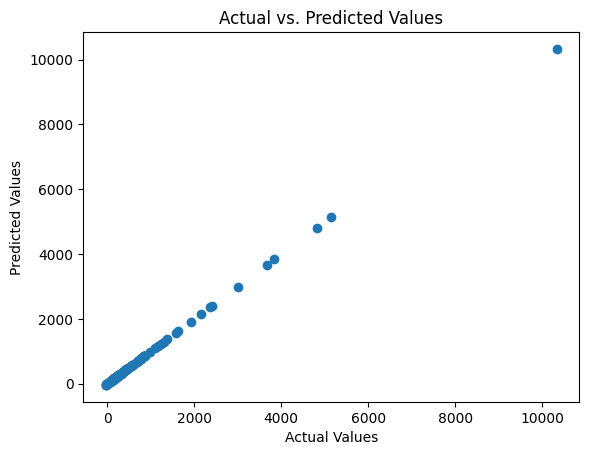

In [ ]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()